In [36]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D,AvgPool2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

Загрузим датасет и посмотрим на изображения.

In [12]:
train,test=cifar10.load_data()

In [13]:
train[0][0].shape

(32, 32, 3)

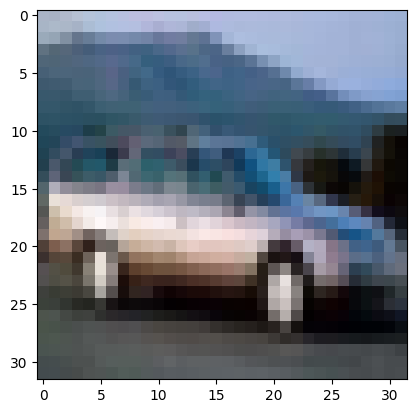

In [14]:
plt.imshow(train[0][4])
plt.show()

In [15]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

Определим константы для обучения модели.

In [16]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [17]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [19]:
Y_train = to_categorical(y_train, NB_CLASSES)
Y_test = to_categorical(y_test, NB_CLASSES) 

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Определим архитектуру сети.

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [23]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,metrics=['accuracy'])

Обучим модель.

In [24]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
	epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE)

Epoch 1/20
313/313 [==============================] - 7s 23ms/step - loss: 1.8646 - accuracy: 0.3415 - val_loss: 1.4965 - val_accuracy: 0.4797
Epoch 2/20
313/313 [==============================] - 7s 23ms/step - loss: 1.4614 - accuracy: 0.4778 - val_loss: 1.3857 - val_accuracy: 0.5140
Epoch 3/20
313/313 [==============================] - 7s 23ms/step - loss: 1.3222 - accuracy: 0.5312 - val_loss: 1.3510 - val_accuracy: 0.5073
Epoch 4/20
313/313 [==============================] - 7s 23ms/step - loss: 1.2273 - accuracy: 0.5624 - val_loss: 1.1554 - val_accuracy: 0.5977
Epoch 5/20
313/313 [==============================] - 7s 23ms/step - loss: 1.1581 - accuracy: 0.5907 - val_loss: 1.1610 - val_accuracy: 0.5921
Epoch 6/20
313/313 [==============================] - 7s 24ms/step - loss: 1.1013 - accuracy: 0.6129 - val_loss: 1.0700 - val_accuracy: 0.6221
Epoch 7/20
313/313 [==============================] - 7s 23ms/step - loss: 1.0568 - accuracy: 0.6281 - val_loss: 1.0508 - val_accuracy: 0.6326

In [25]:
print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Testing...
79/79 [==============================] - 1s 8ms/step - loss: 0.9923 - accuracy: 0.6693

Test score: 0.9923081994056702
Test accuracy: 0.6693000197410583


In [26]:
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


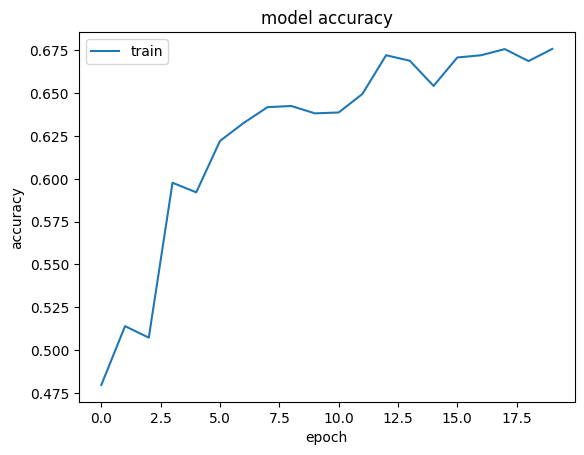

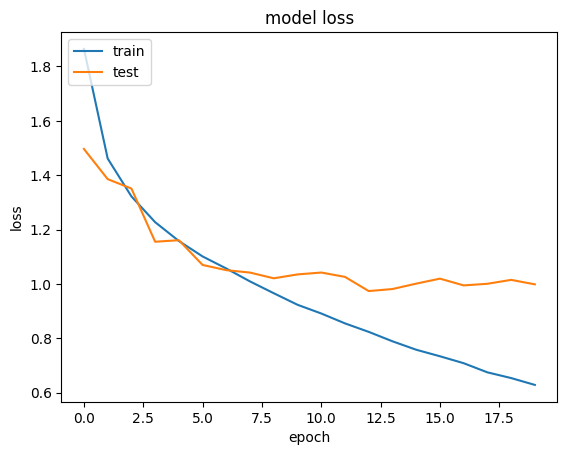

In [27]:
print(history.history.keys())
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Для примера две реализации архитектур сетей в Keras.

# LeNet

In [37]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(AvgPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(AvgPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_8 (Dense)             (None, 120)              

# VGG

In [33]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))


In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 